<a href="https://colab.research.google.com/github/nandanajayachandran/NANDANA_J_ICT_ASSIGNMENTS_CASE_STUDIES/blob/main/Assignment_3_Nandana__J.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ASSIGNMENT -3 ON HYPERPARAMETER TUNING**

In [1]:
#importing libraries for data analysis
import pandas as pd
import numpy as np

In [2]:
#Reading the dataset to python environment
df = pd.read_csv('/content/credit_card_default (1).csv')
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [3]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_1                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [5]:
df.shape

(30000, 25)

In [6]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.553667,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.518326,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,1.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


**PRE-PROCESSING THE DATASET**

In [7]:
#Checking for null values
df.isna().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_1                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

**There are no null values in the dataset.**

**DATA VISUALISATION & EXPLORATORY DATA ANALYSIS**

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

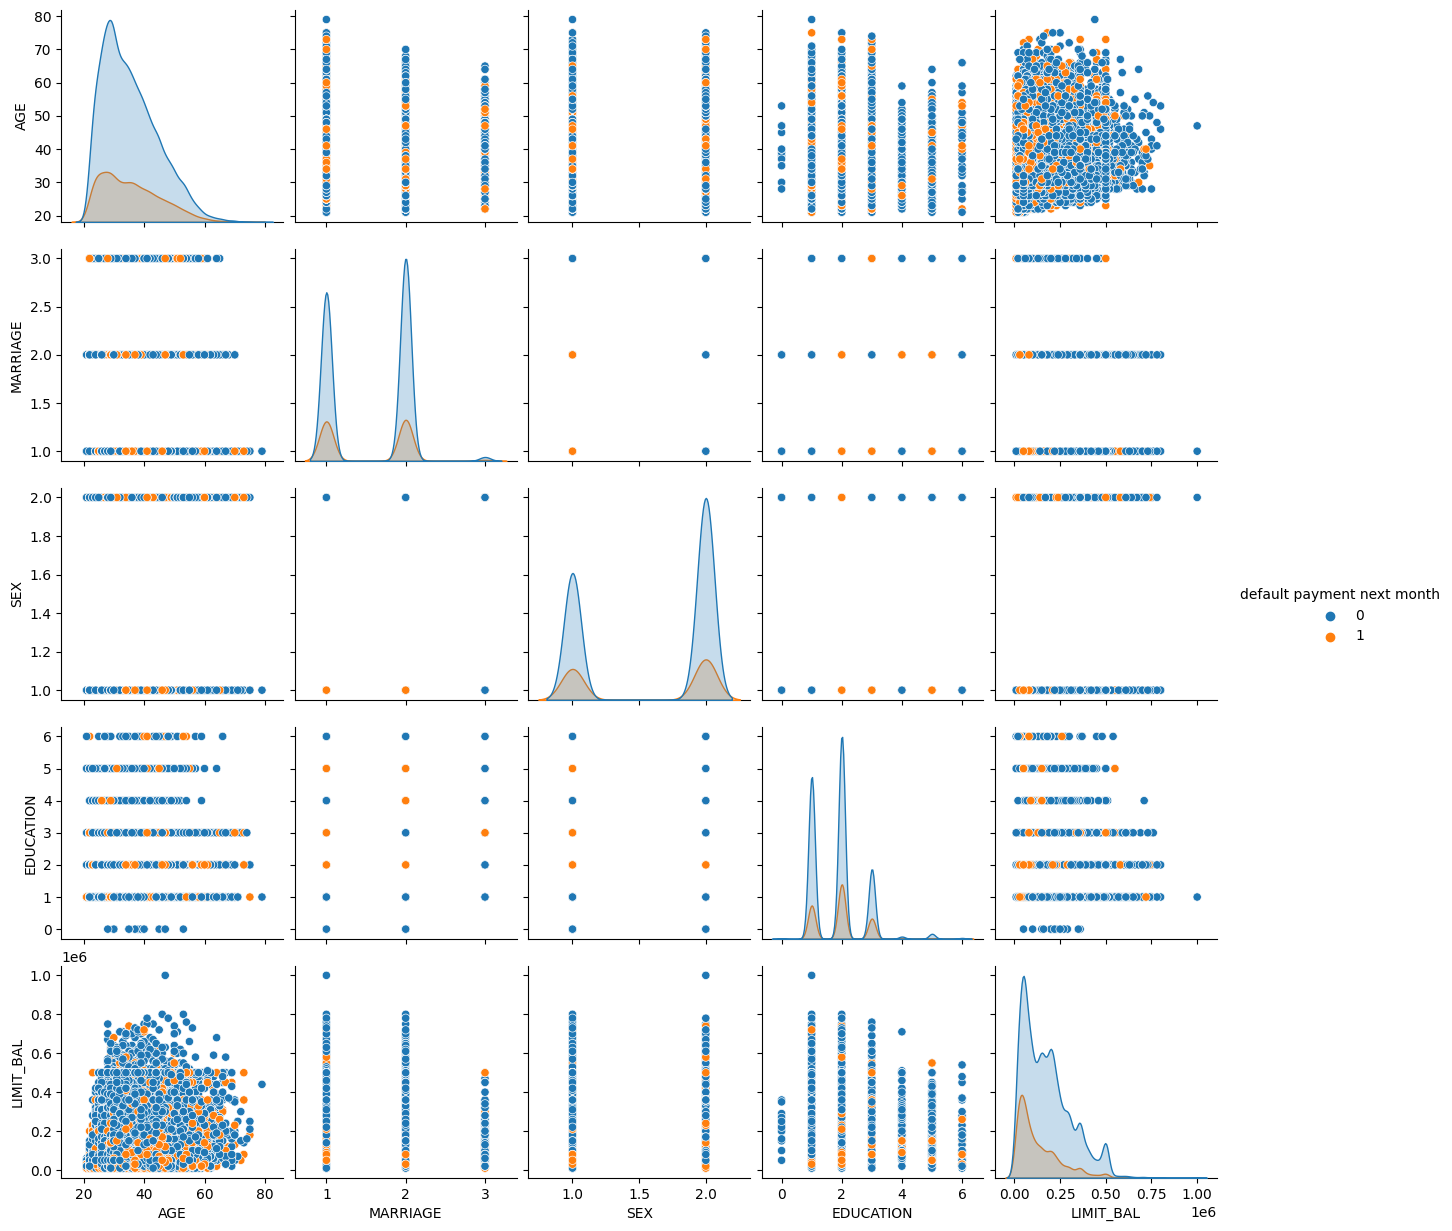

In [9]:
sns.pairplot(df, hue = 'default payment next month', vars = ['AGE', 'MARRIAGE', 'SEX', 'EDUCATION', 'LIMIT_BAL'] )

**HANDLING OUTLIERS**

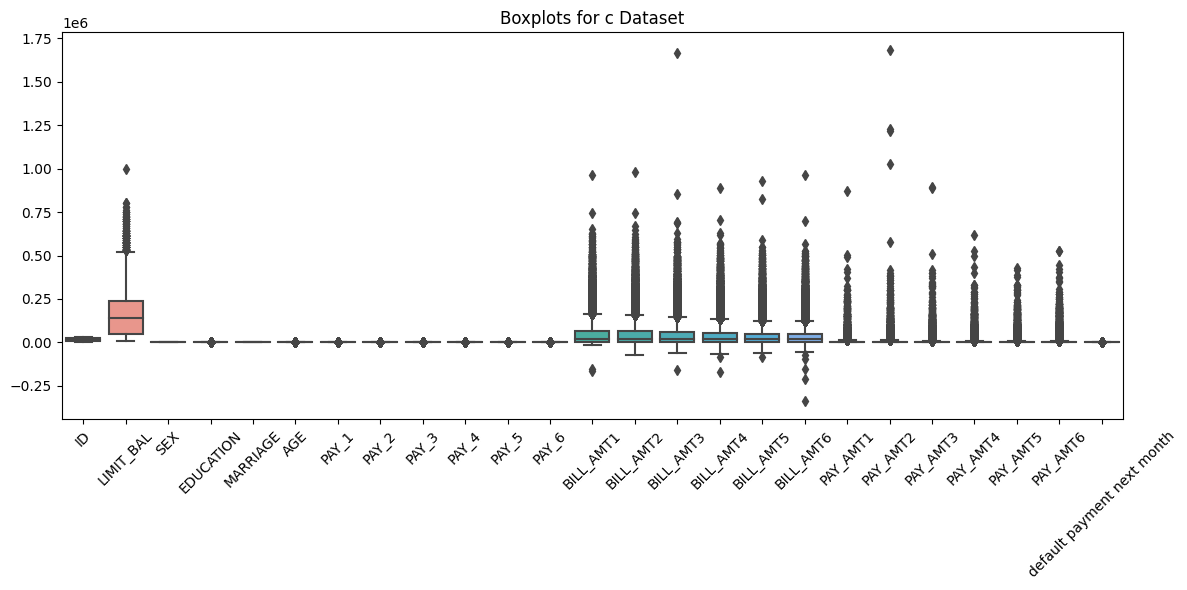

In [10]:
plt.figure(figsize=(12,6))
plt.title("Boxplots for c Dataset")
# Creating box plot
sns.boxplot(df)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [11]:
X = df.drop(['default payment next month'],axis=1)
y = df['default payment next month']

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

**FEATURE SCALING**

In [13]:
min_train = X_train.min()
range_train = (X_train - min_train).max()
X_train_scaled = (X_train - min_train)/range_train

In [14]:
min_test = X_test.min()
range_test = (X_test - min_test).max()
X_test_scaled = (X_test - min_test)/range_test

**MACHINE LEARNING MODELS**

**KNN**

In [15]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score

In [16]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 6)

In [17]:
knn.fit(X_train_scaled, y_train)
y_pred_k = knn.predict(X_test_scaled)
print("Accuracy of KNN:", accuracy_score(y_test, y_pred_k))
print("Precision score of KNN:", precision_score(y_test, y_pred_k))
print("Recall score of KNN:", recall_score(y_test, y_pred_k))
print("F1 score of KNN:", f1_score(y_test, y_pred_k))

Accuracy of KNN: 0.8013333333333333
Precision score of KNN: 0.5988700564971752
Recall score of KNN: 0.24518118735543562
F1 score of KNN: 0.3479212253829322


**SUPPORT VECTOR MACHINE (SVM)**

In [18]:
from sklearn.svm import SVC
svm = SVC()

In [19]:
svm.fit(X_train_scaled, y_train)
y_pred_svm = svm.predict(X_test_scaled)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("SVM Precision score:", precision_score(y_test, y_pred_svm))
print("SVM Recall score:", recall_score(y_test, y_pred_svm))
print("SVM F1 score:", f1_score(y_test, y_pred_svm))

SVM Accuracy: 0.8111666666666667
SVM Precision score: 0.7216216216216216
SVM Recall score: 0.2058596761757903
SVM F1 score: 0.3203359328134373


**GRADIENT BOOSTING**

In [20]:
from sklearn.ensemble import GradientBoostingClassifier
gboost = GradientBoostingClassifier()

In [21]:
gboost.fit(X_train_scaled, y_train)
y_pred_gboost = gboost.predict(X_test_scaled)
print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gboost))
print("Gradient Boosting Precision score:", precision_score(y_test, y_pred_gboost))
print("Gradient Boosting Recall score:", recall_score(y_test, y_pred_gboost))
print("Gradient Boosting F1 score:", f1_score(y_test, y_pred_gboost))


Gradient Boosting Accuracy: 0.6375
Gradient Boosting Precision score: 0.32716535433070865
Gradient Boosting Recall score: 0.6407093292212799
Gradient Boosting F1 score: 0.43315089913995314


**ADA BOOST**

In [22]:
from sklearn.ensemble import AdaBoostClassifier
adaboost = AdaBoostClassifier()

In [23]:
adaboost.fit(X_train_scaled, y_train)
y_pred_adaboost = adaboost.predict(X_test_scaled)
print("AdaBoost Accuracy:", accuracy_score(y_test, y_pred_adaboost))
print("AdaBoost Precision score:", precision_score(y_test, y_pred_adaboost))
print("AdaBoost Recall score:", recall_score(y_test, y_pred_adaboost))
print("AdaBoost F1 score:", f1_score(y_test, y_pred_adaboost))


AdaBoost Accuracy: 0.8238333333333333
AdaBoost Precision score: 0.6973684210526315
AdaBoost Recall score: 0.3269082498072475
AdaBoost F1 score: 0.44514435695538057


**XGBOOST**

In [24]:
import xgboost as xgb
xgboost = xgb.XGBClassifier()

In [25]:
xgboost.fit(X_train_scaled, y_train)
y_pred_xgboost = xgboost.predict(X_test_scaled)
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgboost))
print("XGBoost Precision score:", precision_score(y_test, y_pred_xgboost))
print("XGBoost Recall score:", recall_score(y_test, y_pred_xgboost))
print("XGBoost F1 score:", f1_score(y_test, y_pred_xgboost))


XGBoost Accuracy: 0.7583333333333333
XGBoost Precision score: 0.340956340956341
XGBoost Recall score: 0.1264456437933693
XGBoost F1 score: 0.1844769403824522


**K-FOLD CROSS VALIDATION FOR KNN, SVM, GRADIENT BOOSTING, ADABOOST, & XGBOOST**

In [26]:
from sklearn.model_selection import cross_val_score,KFold

In [27]:
knn = KNeighborsClassifier(n_neighbors = 6)
svm = SVC()
gboost = GradientBoostingClassifier()
adaboost = AdaBoostClassifier()
xgboost = xgb.XGBClassifier()
kf = KFold(n_splits=10)

In [28]:
score_knn = cross_val_score(knn,X,y,cv=kf)
print("K-Fold cross validation score for KNN:",score_knn)
score_svm = cross_val_score(svm,X,y,cv=kf)
print("K-Fold cross validation score for SVM:",score_svm)
score_gboost = cross_val_score(gboost,X,y,cv=kf)
print("K-Fold cross validation score for GRADIENT BOOSTING:",score_gboost)
score_adaboost = cross_val_score(adaboost,X,y,cv=kf)
print("K-Fold cross validation score for ADABOOST:",score_adaboost)
score_xgboost = cross_val_score(xgboost,X,y,cv=kf)
print("K-Fold cross validation score for XGBOOST:",score_xgboost)

K-Fold cross validation score for KNN: [0.767      0.77433333 0.75166667 0.75533333 0.76466667 0.74266667
 0.781      0.78733333 0.78733333 0.763     ]
K-Fold cross validation score for SVM: [0.77733333 0.785      0.76433333 0.77566667 0.772      0.74233333
 0.78466667 0.80866667 0.799      0.779     ]
K-Fold cross validation score for GRADIENT BOOSTING: [0.80466667 0.81266667 0.80766667 0.80466667 0.81533333 0.81766667
 0.83233333 0.85066667 0.83966667 0.82633333]
K-Fold cross validation score for ADABOOST: [0.801      0.81166667 0.80066667 0.801      0.812      0.814
 0.82733333 0.83933333 0.83466667 0.779     ]
K-Fold cross validation score for XGBOOST: [0.79733333 0.80566667 0.80033333 0.79866667 0.801      0.81033333
 0.83166667 0.84433333 0.83533333 0.81433333]


In [29]:
print("Average cross validation score for KNN:",score_knn.mean())
print("Average cross validation score for SVM:",score_svm.mean())
print("Average cross validation score for GRADIENT BOOSTING:",score_gboost.mean())
print("Average cross validation score for ADABOOST:",score_adaboost.mean())
print("Average cross validation score for XGBOOST:",score_xgboost.mean())

Average cross validation score for KNN: 0.7674333333333334
Average cross validation score for SVM: 0.7788
Average cross validation score for GRADIENT BOOSTING: 0.8211666666666666
Average cross validation score for ADABOOST: 0.8120666666666667
Average cross validation score for XGBOOST: 0.8139000000000001


**STRATIFIED CROSS VALIDATION FOR KNN, SVM, GRADIENT BOOSTING, ADABOOST, & XGBOOST**

In [30]:
from sklearn.model_selection import StratifiedKFold

In [31]:
knn = KNeighborsClassifier(n_neighbors = 6)
svm = SVC()
gboost = GradientBoostingClassifier()
adaboost = AdaBoostClassifier()
xgboost = xgb.XGBClassifier()
skfold = StratifiedKFold(n_splits = 10)

In [32]:
score_knn1 = cross_val_score(knn,X,y,cv=skfold)
print("SK-Fold cross validation score for KNN:",score_knn1)
score_svm1 = cross_val_score(svm,X,y,cv=skfold)
print("SK-Fold cross validation score for SVM:",score_svm1)
score_gboost1 = cross_val_score(gboost,X,y,cv=skfold)
print("SK-Fold cross validation score for GRADIENT BOOSTING:",score_gboost1)
score_adaboost1 = cross_val_score(adaboost,X,y,cv=skfold)
print("SK-Fold cross validation score for ADABOOST:",score_adaboost1)
score_xgboost1 = cross_val_score(xgboost,X,y,cv=skfold)
print("SK-Fold cross validation score for XGBOOST:",score_xgboost1)

SK-Fold cross validation score for KNN: [0.768      0.769      0.764      0.75733333 0.767      0.762
 0.77433333 0.76633333 0.771      0.763     ]
SK-Fold cross validation score for SVM: [0.77866667 0.77866667 0.77866667 0.77866667 0.77866667 0.77866667
 0.779      0.779      0.779      0.779     ]
SK-Fold cross validation score for GRADIENT BOOSTING: [0.55166667 0.80933333 0.814      0.808      0.79233333 0.805
 0.79933333 0.80466667 0.82433333 0.82633333]
SK-Fold cross validation score for ADABOOST: [0.803      0.80866667 0.80966667 0.80666667 0.817      0.824
 0.81066667 0.81233333 0.82033333 0.779     ]
SK-Fold cross validation score for XGBOOST: [0.79366667 0.80766667 0.77933333 0.787      0.79666667 0.44033333
 0.62766667 0.56533333 0.81133333 0.81433333]


In [33]:
print("Average cross validation score for KNN:",score_knn1.mean())
print("Average cross validation score for SVM:",score_svm1.mean())
print("Average cross validation score for GRADIENT BOOSTING:",score_gboost1.mean())
print("Average cross validation score for ADABOOST:",score_adaboost1.mean())
print("Average cross validation score for XGBOOST:",score_xgboost1.mean())

Average cross validation score for KNN: 0.7662
Average cross validation score for SVM: 0.7787999999999999
Average cross validation score for GRADIENT BOOSTING: 0.7835
Average cross validation score for ADABOOST: 0.8091333333333335
Average cross validation score for XGBOOST: 0.7223333333333335


**HYPERPARAMETER TUNING FOR KNN, SVM, GRADIENT BOOSTING, ADABOOST, & XGBOOST**

In [36]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

#Performimg Hyperparameter tuning for KNN
knn = KNeighborsClassifier()
param_grid_knn = {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance'], 'p': [1, 2]}
grid_search_knn = GridSearchCV(knn, param_grid_knn, scoring='accuracy', cv=10)
grid_search_knn.fit(X_train_scaled, y_train)
best_knn = grid_search_knn.best_estimator_
y_pred_best_knn = best_knn.predict(X_test_scaled)
print("Best Parameters for KNN: ", grid_search_knn.best_params_)
print("Best Score for KNN: ", grid_search_knn.best_score_)
print("Accuracy of the Best KNN Model:", accuracy_score(y_test, y_pred_best_knn))

Best Parameters for KNN:  {'n_neighbors': 9, 'p': 1, 'weights': 'uniform'}
Best Score for KNN:  0.8035416666666666
Accuracy of the Best KNN Model: 0.8058333333333333


In [37]:
#Performimg Hyperparameter tuning for SVM
svm = SVC()
param_grid_svm = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf', 'poly'], 'gamma': ['scale', 'auto']}
grid_search_svm = GridSearchCV(svm, param_grid_svm, scoring='accuracy', cv=10)
grid_search_svm.fit(X_train_scaled, y_train)
best_svm = grid_search_svm.best_estimator_
y_pred_best_svm = best_svm.predict(X_test_scaled)
print("Best Parameters for SVM: ", grid_search_svm.best_params_)
print("Best Score for SVM: ", grid_search_svm.best_score_)
print("Accuracy of the Best SVM Model:", accuracy_score(y_test, y_pred_best_svm))

Best Parameters for SVM:  {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best Score for SVM:  0.8185
Accuracy of the Best SVM Model: 0.817


In [ ]:
#Performimg Hyperparameter tuning for Gradient Boosting
gboost = GradientBoostingClassifier()
param_grid_gboost = {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7]}
grid_search_gboost = GridSearchCV(gboost, param_grid_gboost, scoring='accuracy', cv=10)
grid_search_gboost.fit(X_train_scaled, y_train)
best_gboost = grid_search_gboost.best_estimator_
y_pred_best_gboost = best_gboost.predict(X_test_scaled)
print("Best Parameters for Gradient Boosting: ", grid_search_gboost.best_params_)
print("Best Score for Gradient Boosting: ", grid_search_gboost.best_score_)
print("Accuracy of the Best Gradient Boosting Model:", accuracy_score(y_test, y_pred_best_gboost))

In [ ]:
#Performimg Hyperparameter tuning for AdaBoost
adaboost = AdaBoostClassifier()
param_grid_adaboost = {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2]}
grid_search_adaboost = GridSearchCV(adaboost, param_grid_adaboost, scoring='accuracy', cv=10)
grid_search_adaboost.fit(X_train_scaled, y_train)
best_adaboost = grid_search_adaboost.best_estimator_
y_pred_best_adaboost = best_adaboost.predict(X_test_scaled)
print("Best Parameters for AdaBoost: ", grid_search_adaboost.best_params_)
print("Best Score for AdaBoost: ", grid_search_adaboost.best_score_)
print("Accuracy of the Best AdaBoost Model:", accuracy_score(y_test, y_pred_best_adaboost))


In [ ]:
#Performimg Hyperparameter tuning for XGBoost
xgboost = xgb.XGBClassifier()
param_grid_xgboost = {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7]}
grid_search_xgboost = GridSearchCV(xgboost, param_grid_xgboost, scoring='accuracy', cv=10)
grid_search_xgboost.fit(X_train_scaled, y_train)
best_xgboost = grid_search_xgboost.best_estimator_
y_pred_best_xgboost = best_xgboost.predict(X_test_scaled)
print("Best Parameters for XGBoost: ", grid_search_xgboost.best_params_)
print("Best Score for XGBoost: ", grid_search_xgboost.best_score_)
print("Accuracy of the Best XGBoost Model:", accuracy_score(y_test, y_pred_best_xgboost))


In [ ]:
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold

# Hyperparameter tuning for KNN using RandomizedSearchCV
knn = KNeighborsClassifier()
param_dist_knn = {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance'], 'p': [1, 2]}
random_search_knn = RandomizedSearchCV(knn, param_distributions=param_dist_knn, n_iter=10, scoring='accuracy', cv=10)
random_search_knn.fit(X_train_scaled, y_train)
best_knn = random_search_knn.best_estimator_
y_pred_best_knn = best_knn.predict(X_test_scaled)
print("Best Parameters for KNN: ", random_search_knn.best_params_)
print("Best Score for KNN: ", random_search_knn.best_score_)
print("Accuracy of the Best KNN Model:", accuracy_score(y_test, y_pred_best_knn))

# Hyperparameter tuning for SVM using RandomizedSearchCV
svm = SVC()
param_dist_svm = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf', 'poly'], 'gamma': ['scale', 'auto']}
random_search_svm = RandomizedSearchCV(svm, param_distributions=param_dist_svm, n_iter=10, scoring='accuracy', cv=10)
random_search_svm.fit(X_train_scaled, y_train)
best_svm = random_search_svm.best_estimator_
y_pred_best_svm = best_svm.predict(X_test_scaled)
print("Best Parameters for SVM: ", random_search_svm.best_params_)
print("Best Score for SVM: ", random_search_svm.best_score_)
print("Accuracy of the Best SVM Model:", accuracy_score(y_test, y_pred_best_svm))

# Hyperparameter tuning for Gradient Boosting using RandomizedSearchCV
gboost = GradientBoostingClassifier()
param_dist_gboost = {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7]}
random_search_gboost = RandomizedSearchCV(gboost, param_distributions=param_dist_gboost, n_iter=10, scoring='accuracy', cv=10)
random_search_gboost.fit(X_train_scaled, y_train)
best_gboost = random_search_gboost.best_estimator_
y_pred_best_gboost = best_gboost.predict(X_test_scaled)
print("Best Parameters for Gradient Boosting: ", random_search_gboost.best_params_)
print("Best Score for Gradient Boosting: ", random_search_gboost.best_score_)
print("Accuracy of the Best Gradient Boosting Model:", accuracy_score(y_test, y_pred_best_gboost))

# Hyperparameter tuning for AdaBoost using RandomizedSearchCV
adaboost = AdaBoostClassifier()
param_dist_adaboost = {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2]}
random_search_adaboost = RandomizedSearchCV(adaboost, param_distributions=param_dist_adaboost, n_iter=10, scoring='accuracy', cv=10)
random_search_adaboost.fit(X_train_scaled, y_train)
best_adaboost = random_search_adaboost.best_estimator_
y_pred_best_adaboost = best_adaboost.predict(X_test_scaled)
print("Best Parameters for AdaBoost: ", random_search_adaboost.best_params_)
print("Best Score for AdaBoost: ", random_search_adaboost.best_score_)
print("Accuracy of the Best AdaBoost Model:", accuracy_score(y_test, y_pred_best_adaboost))

# Hyperparameter tuning for XGBoost using RandomizedSearchCV
xgboost = xgb.XGBClassifier()
param_dist_xgboost = {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7]}
random_search_xgboost = RandomizedSearchCV(xgboost, param_distributions=param_dist_xgboost, n_iter=10, scoring='accuracy', cv=10)
random_search_xgboost.fit(X_train_scaled, y_train)
best_xgboost = random_search_xgboost.best_estimator_
y_pred_best_xgboost = best_xgboost.predict(X_test_scaled)
print("Best Parameters for XGBoost: ", random_search_xgboost.best_params_)
print("Best Score for XGBoost: ", random_search_xgboost.best_score_)
print("Accuracy of the Best XGBoost Model:", accuracy_score(y_test, y_pred_best_xgboost))


In [ ]:
pip install hyperopt


In [ ]:
from hyperopt import fmin, tpe, hp, Trials
from sklearn.model_selection import cross_val_score

# Define the search space for each model
space_knn = {
    'n_neighbors': hp.choice('n_neighbors', [3, 5, 7, 9]),
    'weights': hp.choice('weights', ['uniform', 'distance']),
    'p': hp.choice('p', [1, 2])
}

space_svm = {
    'C': hp.loguniform('C', -3, 2),
    'kernel': hp.choice('kernel', ['linear', 'rbf', 'poly']),
    'gamma': hp.choice('gamma', ['scale', 'auto'])
}

space_gboost = {
    'n_estimators': hp.choice('n_estimators', [50, 100, 200]),
    'learning_rate': hp.loguniform('learning_rate', -3, 0),
    'max_depth': hp.choice('max_depth', [3, 5, 7])
}

space_adaboost = {
    'n_estimators': hp.choice('n_estimators', [50, 100, 200]),
    'learning_rate': hp.loguniform('learning_rate', -3, 0)
}

space_xgboost = {
    'n_estimators': hp.choice('n_estimators', [50, 100, 200]),
    'learning_rate': hp.loguniform('learning_rate', -3, 0),
    'max_depth': hp.choice('max_depth', [3, 5, 7])
}

# Define objective functions for each model
def objective_knn(params):
    knn = KNeighborsClassifier(**params)
    score = cross_val_score(knn, X_train_scaled, y_train, cv=10, scoring='accuracy').mean()
    return -score  # Hyperopt minimizes, so we use the negative of the score

def objective_svm(params):
    svm = SVC(**params)
    score = cross_val_score(svm, X_train_scaled, y_train, cv=10, scoring='accuracy').mean()
    return -score

def objective_gboost(params):
    gboost = GradientBoostingClassifier(**params)
    score = cross_val_score(gboost, X_train_scaled, y_train, cv=10, scoring='accuracy').mean()
    return -score

def objective_adaboost(params):
    adaboost = AdaBoostClassifier(**params)
    score = cross_val_score(adaboost, X_train_scaled, y_train, cv=10, scoring='accuracy').mean()
    return -score

def objective_xgboost(params):
    xgboost = xgb.XGBClassifier(**params)
    score = cross_val_score(xgboost, X_train_scaled, y_train, cv=10, scoring='accuracy').mean()
    return -score

# Run optimization for each model
trials_knn = Trials()
best_knn = fmin(fn=objective_knn, space=space_knn, algo=tpe.suggest, max_evals=10, trials=trials_knn)
best_knn_params = space_eval(space_knn, best_knn)
knn = KNeighborsClassifier(**best_knn_params)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)
print("Best Parameters for KNN:", best_knn_params)
print("Accuracy of the Best KNN Model:", accuracy_score(y_test, y_pred_knn))

trials_svm = Trials()
best_svm = fmin(fn=objective_svm, space=space_svm, algo=tpe.suggest, max_evals=10, trials=trials_svm)
best_svm_params = space_eval(space_svm, best_svm)
svm = SVC(**best_svm_params)
svm.fit(X_train_scaled, y_train)
y_pred_svm = svm.predict(X_test_scaled)
print("Best Parameters for SVM:", best_svm_params)
print("Accuracy of the Best SVM Model:", accuracy_score(y_test, y_pred_svm))

trials_gboost = Trials()
best_gboost = fmin(fn=objective_gboost, space=space_gboost, algo=tpe.suggest, max_evals=10, trials=trials_gboost)
best_gboost_params = space_eval(space_gboost, best_gboost)
gboost = GradientBoostingClassifier(**best_gboost_params)
gboost.fit(X_train_scaled, y_train)
y_pred_gboost = gboost.predict(X_test_scaled)
print("Best Parameters for Gradient Boosting:", best_gboost_params)
print("Accuracy of the Best Gradient Boosting Model:", accuracy_score(y_test, y_pred_gboost))

trials_adaboost = Trials()
best_adaboost = fmin(fn=objective_adaboost, space=space_adaboost, algo=tpe.suggest, max_evals=10, trials=trials_adaboost)
best_adaboost_params = space_eval(space_adaboost, best_adaboost)
adaboost = AdaBoostClassifier(**best_adaboost_params)
adaboost.fit(X_train_scaled, y_train)
y_pred_adaboost = adaboost.predict(X_test_scaled)
print("Best Parameters for AdaBoost:", best_adaboost_params)
print("Accuracy of the Best AdaBoost Model:", accuracy_score(y_test, y_pred_adaboost))

trials_xgboost = Trials()
best_xgboost = fmin(fn=objective_xgboost, space=space_xgboost, algo=tpe.suggest, max_evals=10, trials=trials_xgboost)
best_xgboost_params = space_eval(space_xgboost, best_xgboost)
xgboost = xgb.XGBClassifier(**best_xgboost_params)
xgboost.fit(X_train_scaled, y_train)
y_pred_xgboost = xgboost.predict(X_test_scaled)
print("Best Parameters for XGBoost:", best_xgboost_params)
print("Accuracy of the Best XGBoost Model:", accuracy_score(y_test, y_pred_xgboost))
